In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Roe z Clawpacku
num_eqn = 2
num_waves = 2

def shallow_roe_1D(q_l, q_r, aux_l, aux_r, problem_data):
    r"""
    Roe shallow water solver in 1d::
        ubar = (sqrt(u_l) + sqrt(u_r)) / (sqrt(h_l) + sqrt(h_r))
        cbar = sqrt( 0.5 * g * (h_l + h_r))
        W_1 = |      1      |  s_1 = ubar - cbar
              | ubar - cbar |
        W_2 = |      1      |  s_1 = ubar + cbar
              | ubar + cbar |
        a1 = 0.5 * ( - delta_hu + (ubar + cbar) * delta_h ) / cbar
        a2 = 0.5 * (   delta_hu - (ubar - cbar) * delta_h ) / cbar
    *problem_data* should contain:
     - *g* - (float) Gravitational constant
     - *efix* - (bool) Boolean as to whether a entropy fix should be used, if
       not present, false is assumed
    :Version: 1.0 (2009-02-05)
    """

    # Array shapes
    num_rp = q_l.shape[1]

    # Output arrays
    wave = np.empty( (num_eqn, num_waves, num_rp) )
    s = np.zeros( (num_waves, num_rp) )
    amdq = np.zeros( (num_eqn, num_rp) )
    apdq = np.zeros( (num_eqn, num_rp) )

    # Compute roe-averaged quantities
    ubar = ( (q_l[1,:]/np.sqrt(q_l[0,:]) + q_r[1,:]/np.sqrt(q_r[0,:])) /
             (np.sqrt(q_l[0,:]) + np.sqrt(q_r[0,:])) )
    cbar = np.sqrt(0.5 * problem_data['grav'] * (q_l[0,:] + q_r[0,:]))

    # Compute Flux structure
    delta = q_r - q_l
    a1 = 0.5 * (-delta[1,:] + (ubar + cbar) * delta[0,:]) / cbar
    a2 = 0.5 * ( delta[1,:] - (ubar - cbar) * delta[0,:]) / cbar

    # Compute each family of waves
    wave[0,0,:] = a1
    wave[1,0,:] = a1 * (ubar - cbar)
    s[0,:] = ubar - cbar

    wave[0,1,:] = a2
    wave[1,1,:] = a2 * (ubar + cbar)
    s[1,:] = ubar + cbar

    if problem_data['efix']:
        raise NotImplementedError("Entropy fix has not been implemented.")
    else:
        s_index = np.zeros((2,num_rp))
        for m in range(num_eqn):
            for mw in range(num_waves):
                s_index[0,:] = s[mw,:]
                amdq[m,:] += np.min(s_index,axis=0) * wave[m,mw,:]
                apdq[m,:] += np.max(s_index,axis=0) * wave[m,mw,:]

    return wave, s, amdq, apdq

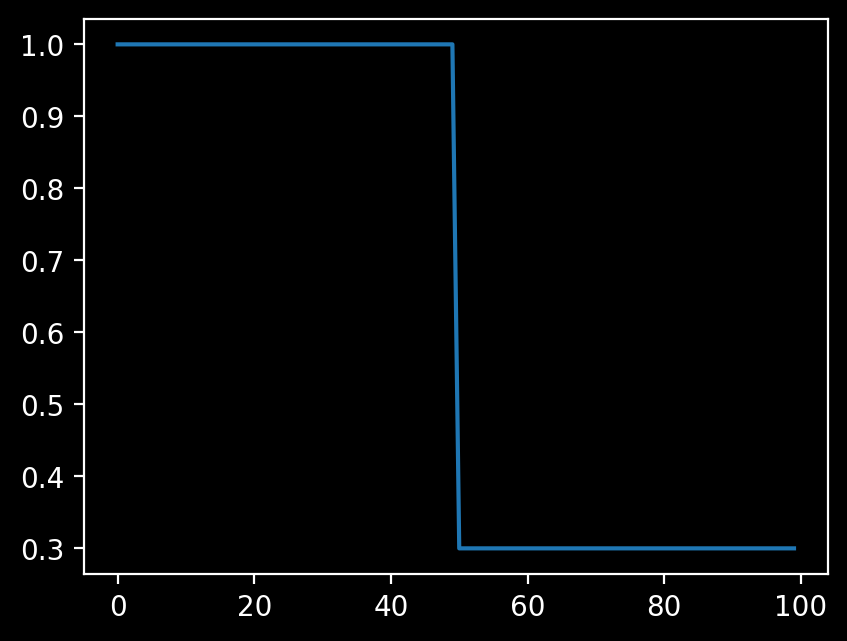

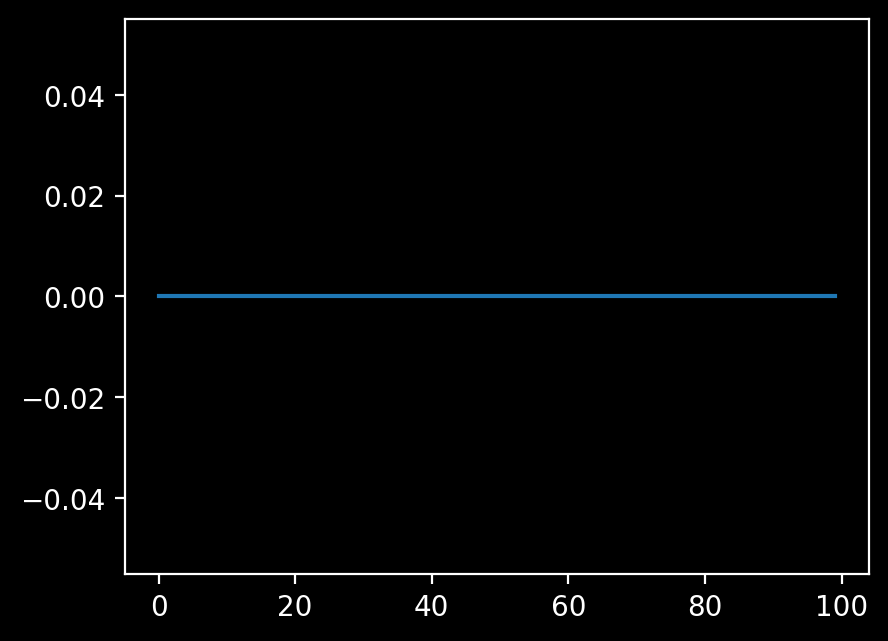

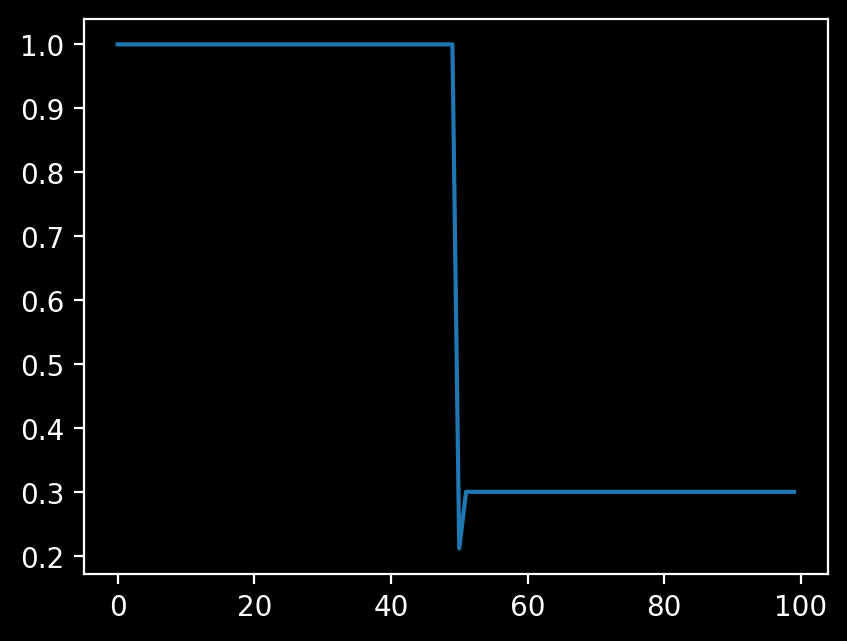

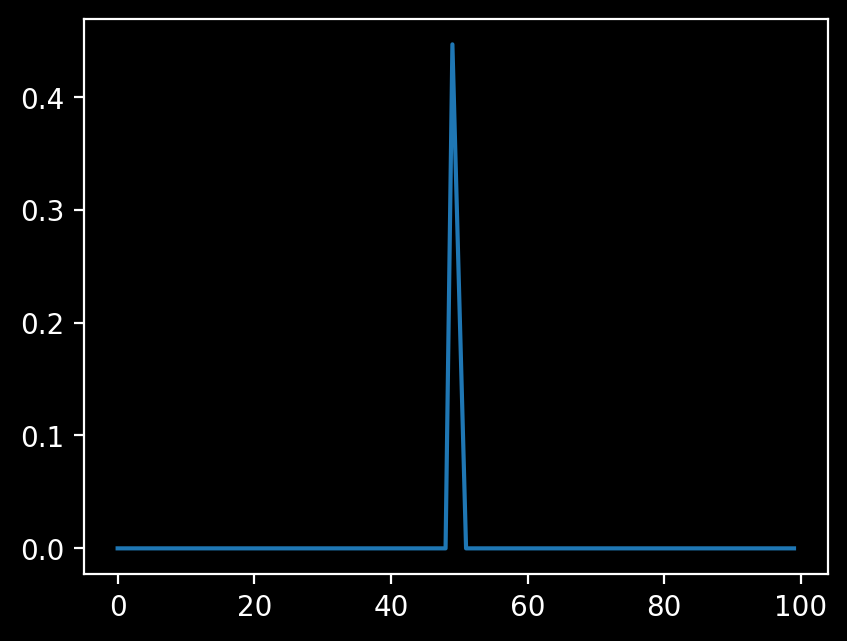

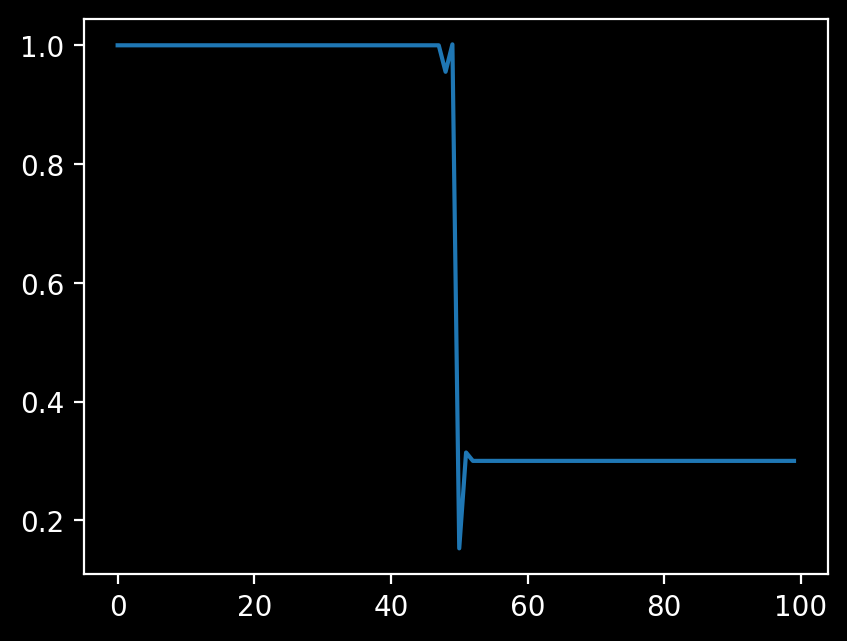

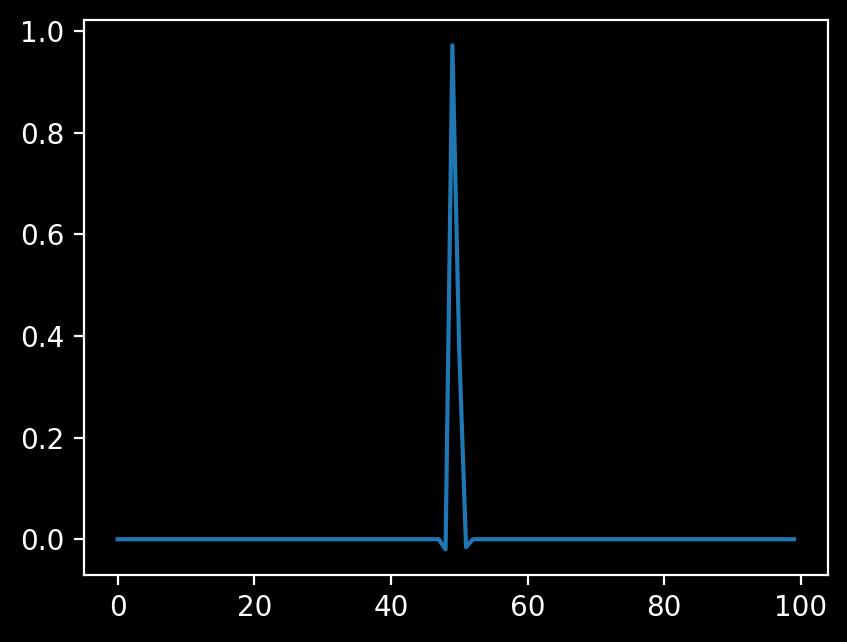

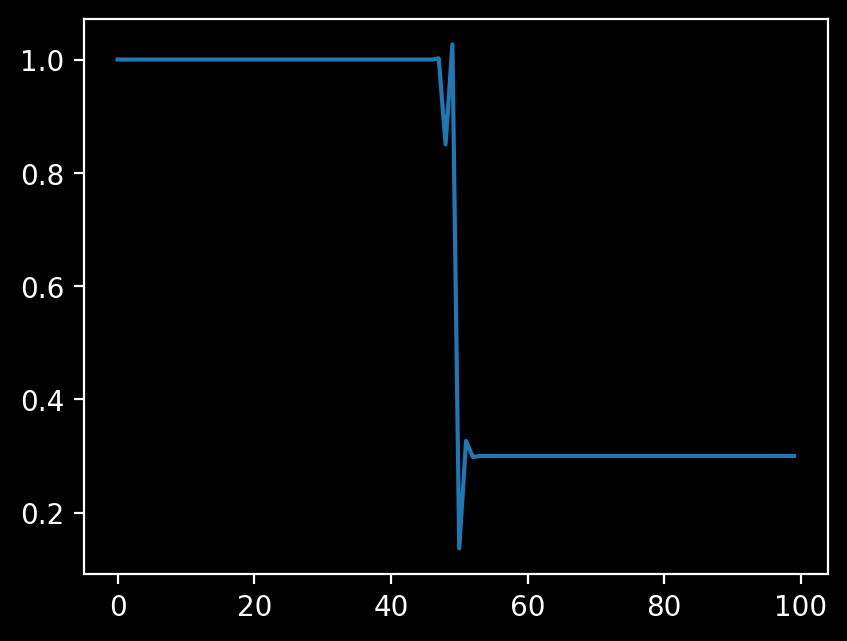

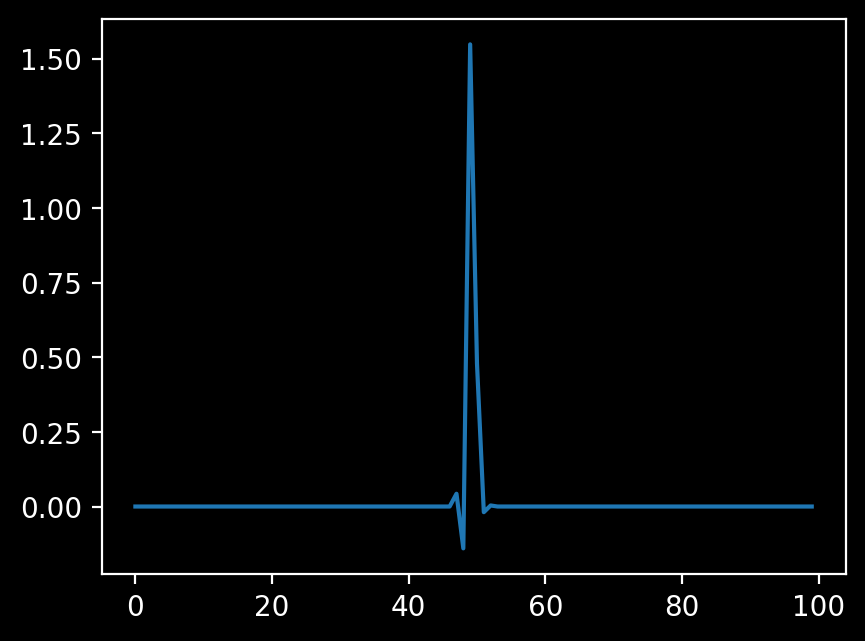

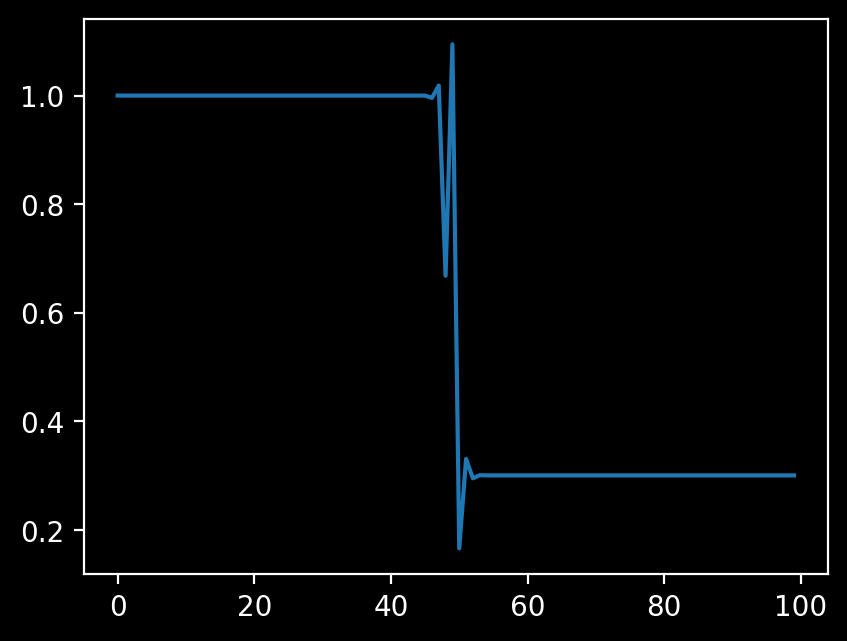

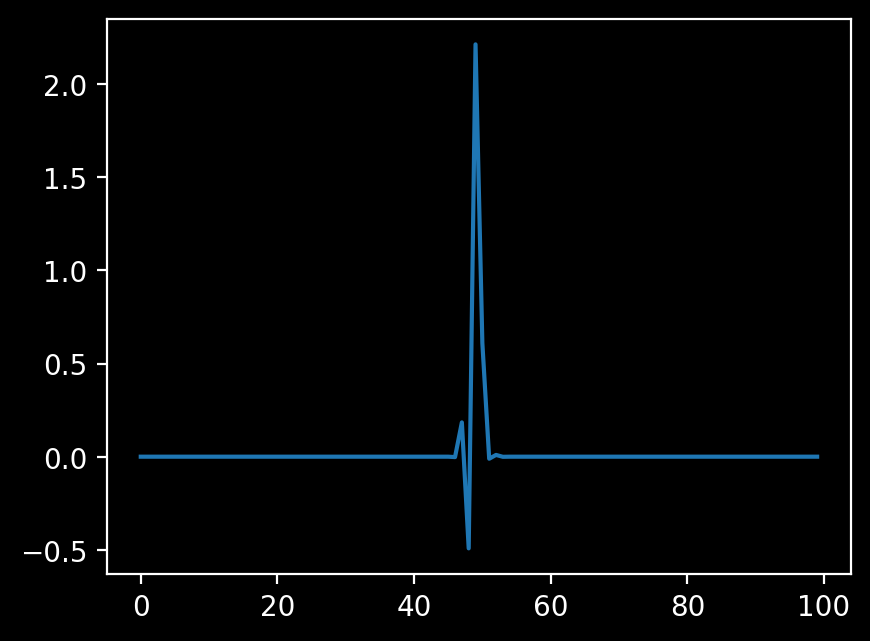

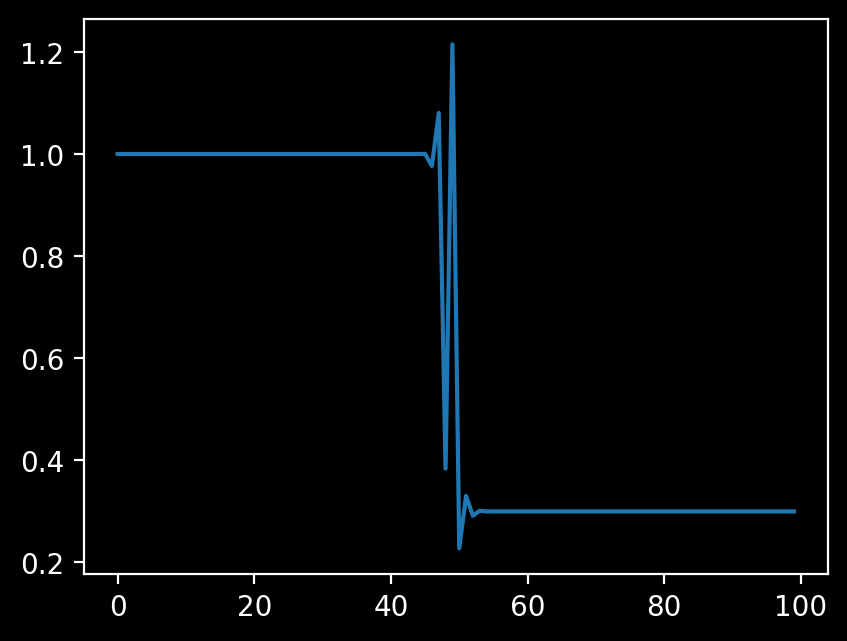

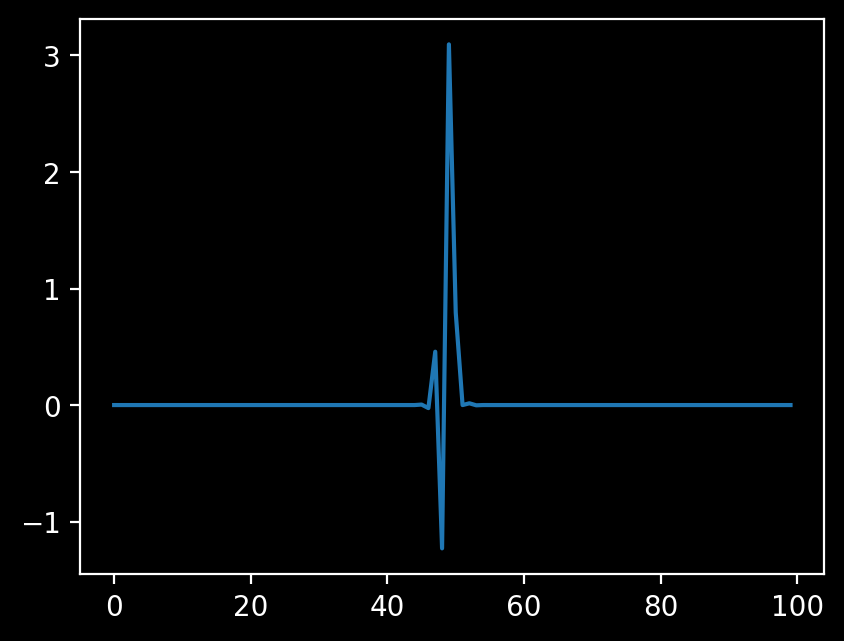

In [20]:
# constants
grav = 9.81

# domain
N = 100
dx = 0.01
dt = 0.001
dtdx = dt/dx

# initial conditions
# q = [h, hu]
# POZOR, MUSI BYT CELOU DOBU KLADNA A TO I PO PROHNANI RESICEM
q_state = np.zeros([2,N])
q_state[0,0:int(N/2)] = 1
q_state[0,int(N/2):] = .3
#q_state[0,:] = .1 * np.sin(np.linspace(0,4*np.pi,N)) +1


# problem_data
problem_data = {'grav' : grav,
               'efix' : False}
aux_l, aux_r = 0, 0

plt.plot(q_state[0,:])
plt.show()
plt.plot(q_state[1,:])
plt.show()

# run Roe solver
for i in range(5):
    q_l = q_state[:,:-1]
    q_r = q_state[:,1:]

    wave, s, amdq, apdq = shallow_roe_1D(q_l, q_r, aux_l, aux_r, problem_data)
    
    q_state[:,:-1] = q_state[:,:-1] - dtdx * (apdq + amdq)
    q_state[:,1:] = q_state[:,1:] - dtdx * amdq
    
    plt.plot(q_state[0,:])
    plt.show()
    plt.plot(q_state[1,:])
    plt.show()


[[ 0.         0.         1.0452697  0.         0.       ]
 [ 0.         0.        -2.427975   0.         0.       ]]
[[ 0.         0.        -1.0452697  0.         0.       ]
 [ 0.         0.        -2.427975   0.         0.       ]]
[[1.  1.  1.  0.1 0.1 0.1]
 [0.  0.  0.  0.  0.  0. ]]


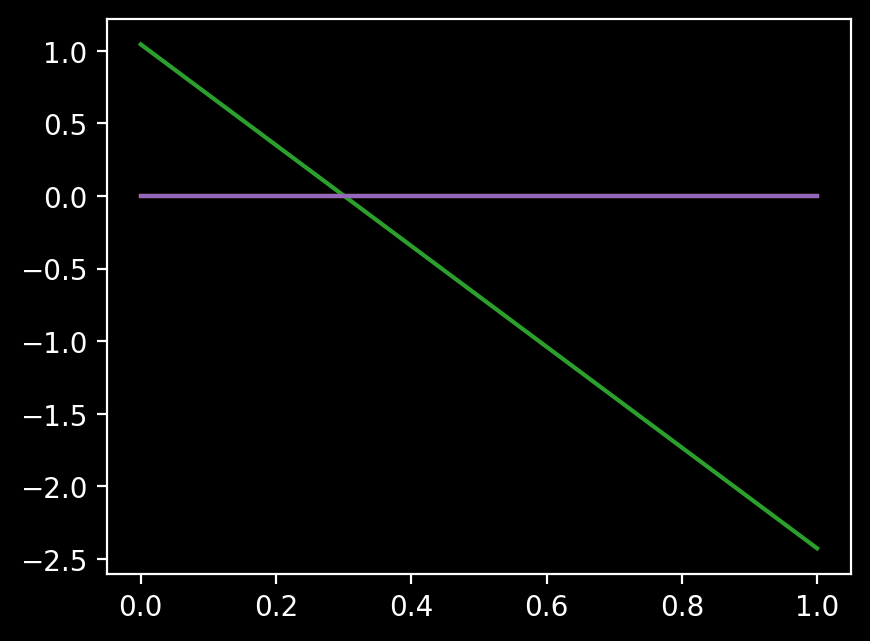

In [4]:
print(amdq)
print(apdq)
print(q_init)
plt.plot(amdq)

In [27]:
print(q_init)
print(q_l)
print(q_r)

print(wave)

[[1.  1.  1.  0.1 0.1 0.1]
 [0.  0.  0.  0.  0.  0. ]]
[[1.  1.  1.  0.1 0.1]
 [0.  0.  0.  0.  0. ]]
[[1.  1.  0.1 0.1 0.1]
 [0.  0.  0.  0.  0. ]]
[[[ 0.         0.        -0.45       0.         0.       ]
  [ 0.         0.        -0.45       0.         0.       ]]

 [[-0.        -0.         1.0452697 -0.        -0.       ]
  [ 0.         0.        -1.0452697  0.         0.       ]]]
